# Natural Language Processing Project



We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.




---------





In [1]:

# importing our libraries

import pandas as pd
import numpy as np

# =======================

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

/Users/Create/anaconda3/envs/DS/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
# opening the data from yelp

yelp_data = pd.read_csv('yelp.csv')
yelp_data.head(2) # what is in this data?

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [3]:

# Checking the info on the data

yelp_data.info()  # 10,0000 number of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
# checking for the numerical columsn via the describe stats method

yelp_data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [5]:
# creating a new column called text length...which is the number of words in the columns 

yelp_data['text length'] = yelp_data['text'].apply(len)

yelp_data.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


# Exploratory Data Aanalysis (EDA)

Let's explore the data


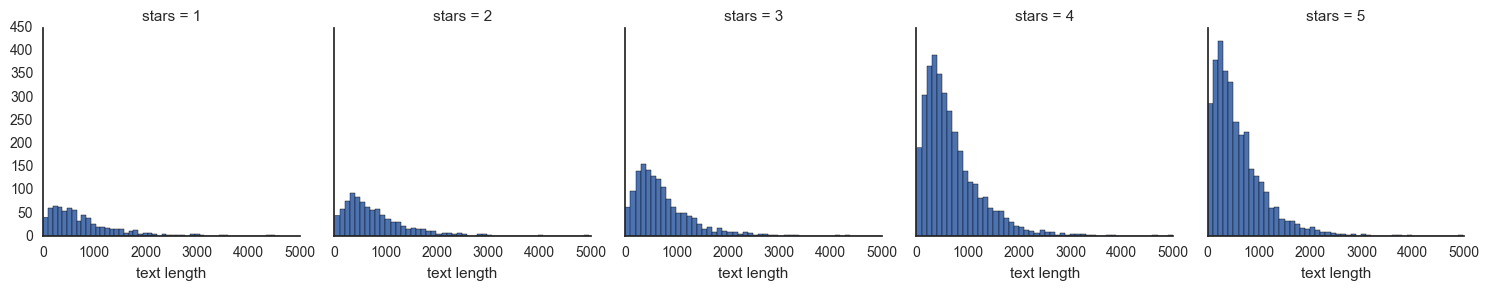

In [6]:
# creating a plot
# setting a grid for the stars columns 

sns.set_style('white')
g = sns.FacetGrid(yelp_data, col='stars')
g.map(plt.hist, 'text length', bins = 50) 

It seems the distribution of text lenght seems to be the same for all the amount of starts.  Yet, the amount of text reviews seems to be skew a lot higher for 4 and 5 stars. 

**Create a boxplot of text length for each star category.**

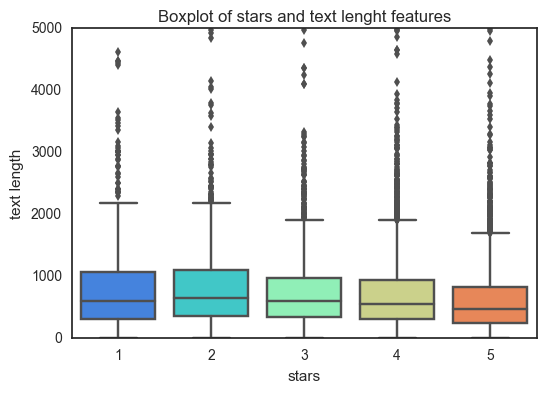

In [7]:
# creating a boxplot of text length and the star category

plt.title('Boxplot of stars and text lenght features')
sns.boxplot(x='stars', y='text length', data=yelp_data, palette='rainbow')

**Is text length an important feature?**

-------

The boxplot above shows that the 1 and 2 star reviews have higher text lenghts but there are so many outliers shown by this dots outside of the box that it may not be a useful feature.

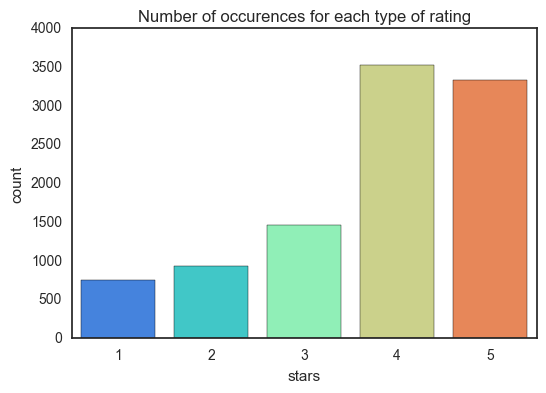

In [8]:
plt.title('Number of occurences for each type of rating')
sns.countplot(x='stars', data=yelp_data, palette='rainbow')

The plot above confirms what we have in the histogram.  The greatest count of ratings are from 4 stars and then from 5 stars.

In [9]:
# Using groupby to get the mean values of the numerical columns 

stars = yelp_data.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [10]:
# Use the corr() method on that groupby dataframe to produce the correlations 
# of all the columns to each other

stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


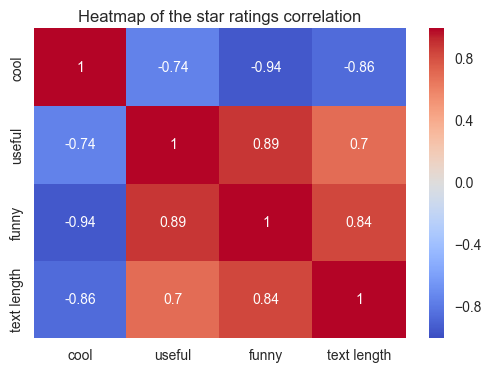

In [11]:
# Then use seaborn to create a heatmap based off that .corr() dataframe

plt.title('Heatmap of the star ratings correlation')
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

It seems that funny is highly correlated to the useful value.  And, useful is correlated to text length. We also have some negative correlations between cool, useful, funny and text lenght.  However, we probably need to know how users in yelp use the cool, useful, funny to get a better intuition of what those features actually mean. 

## Performing the NLP Classification 

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.


In [12]:
# Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.


yelp_class = yelp_data[(yelp_data['stars'] == 1) | (yelp_data['stars'] == 5)]
print(yelp_class.info())
yelp_class.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB
None


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


We noticed that we get about half the columns (4086)

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [13]:

# creating our features and target labels 

X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() # count vectorizer model and instantiated 

** Use the fit_transform method on the CountVectorizer object and pass in X.**

In [15]:
# transforming X
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [16]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

/Users/Create/anaconda3/envs/DS/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [17]:
# import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [18]:
# trainning the data 
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [19]:
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

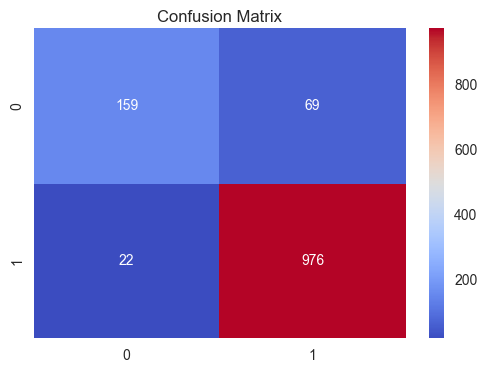

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, predictions), cmap='coolwarm', annot=True, fmt='g')


In [21]:
classification_report = print(classification_report(y_test, predictions))
classification_report

             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



We are looking at arount **90%** of accuracy precision and recall on between the 1 score and the 5 score based only on the text data.  
This is a good!

**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

** Import Pipeline from sklearn. **

In [23]:
from sklearn.pipeline import Pipeline


** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [24]:
# creating the pipeline and passing a list of tuples 

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

### Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split


In [25]:

# Redo the train test split on the yelp_class object.
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [26]:
# Fitting the data
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix.**

In [27]:
predictions = pipeline.predict(X_test)

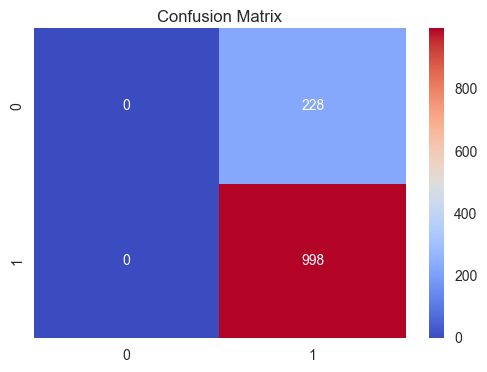

In [28]:
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, predictions), cmap='coolwarm', annot=True, fmt='g')


When we included in the model Tf-Idf actually made things worse!

We can still explore more.  The backofwords model did very good though.



##  End